# Task1:

chosen dataset: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

# Task2:

In [ ]:

from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode, skew, kurtosis
from sklearn.metrics import precision_score, recall_score, f1_score

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML_Project/brain_stroke.csv'
df = pd.read_csv(file_path)

# Pre-prossing the data:

# Handling Missing Values: Fill missing values with the mean of the column
df.fillna(df.mean(numeric_only=True), inplace=True)
#df.fillna(df.mean(), inplace=True)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataset to verify
df.head()

# Split data
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the encoded dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in [1, 3]:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"KNN, k={k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")

# Display statistics for each feature in the dataset
feature_statistics = df.describe()

# Display the mean, standard deviation, and other statistics
print("Mean of each feature:")
print(feature_statistics.loc['mean'])

print("\nStandard deviation of each feature:")
print(feature_statistics.loc['std'])

# Display mode, skewness, and kurtosis for each feature in the dataset
print("Mode of each feature:")
print(df.mode().iloc[0])

print("\nSkewness of each feature:")
print(df.apply(skew))

print("\nKurtosis of each feature:")
print(df.apply(kurtosis))

# Display correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
KNN, k=1: Accuracy = 0.9178, Precision = 0.9046, Recall = 0.9178, F1-Score = 0.9109
KNN, k=3: Accuracy = 0.9388, Precision = 0.9058, Recall = 0.9388, F1-Score = 0.9193
Mean of each feature:
age                                43.419859
hypertension                        0.096165
heart_disease                       0.055210
avg_glucose_level                 105.943562
bmi                                28.498173
stroke                              0.049789
gender_Male                         0.416382
ever_married_Yes                    0.658502
work_type_Private                   0.574182
work_type_Self-employed             0.161413
work_type_children                  0.135113
Residence_type_Urban                0.508332
smoking_status_formerly smoked      0.174061
smoking_status_never smoked         0.369002
smoking_status_smokes               0.155792
Name: 

# Task3

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML_Project/brain_stroke.csv'
df = pd.read_csv(file_path)

# Handling Missing Values: Fill missing values with the mean of the column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify categorical columns excluding the target variable
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataset to verify
df.head()

# Split data
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def evaluate_model(y_train, y_pred, model_name, Parameter_name, parameter):
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_train, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_train, y_pred, average='weighted', zero_division=1)
    print(f"{model_name} ({Parameter_name}={parameter}): Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")
    return accuracy, y_pred

# Model 1: Logistic Regression with Cross-Validation
print("Model 1: Logistic Regression with Cross-Validation")
for C in [0.1, 1, 10, 100]:
    model1 = LogisticRegression(C=C, class_weight='balanced', penalty='l2', solver='lbfgs') # add Loss Function: penalty='l2' to indicate L2 regularization
    model1.fit(X_train, y_train)
    y_pred = cross_val_predict(model1, X_train, y_train, cv=3)  # 3-fold cross-validation
    accuracy, _ = evaluate_model(y_train, y_pred, "Logistic Regrision", "C", C)

# Model 2: Random Forest with Cross-Validation
print("\nModel 2: Random Forest with Cross-Validation")
for n_estimators in [50, 100, 150, 200]:
    model2 = RandomForestClassifier(n_estimators=n_estimators, class_weight='balanced', random_state=42)
    model2.fit(X_train, y_train)
    y_pred = cross_val_predict(model2, X_train, y_train, cv=3)  # 3-fold cross-validation
    accuracy, _ = evaluate_model(y_train, y_pred, "Random Forest", "n_estimators", n_estimators)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model 1: Logistic Regression with Cross-Validation
Logistic Regrision (C=0.1): Accuracy = 0.7317, Precision = 0.9451, Recall = 0.7317, F1-Score = 0.8079
Logistic Regrision (C=1): Accuracy = 0.7334, Precision = 0.9459, Recall = 0.7334, F1-Score = 0.8092
Logistic Regrision (C=10): Accuracy = 0.7339, Precision = 0.9460, Recall = 0.7339, F1-Score = 0.8095
Logistic Regrision (C=100): Accuracy = 0.7339, Precision = 0.9460, Recall = 0.7339, F1-Score = 0.8095

Model 2: Random Forest with Cross-Validation
Random Forest (n_estimators=50): Accuracy = 0.9508, Precision = 0.9050, Recall = 0.9508, F1-Score = 0.9273
Random Forest (n_estimators=100): Accuracy = 0.9503, Precision = 0.9049, Recall = 0.9503, F1-Score = 0.9271
Random Forest (n_estimators=150): Accuracy = 0.9511, Precision = 0.9050, Recall = 0.9511, F1-Score = 0.9274
Random Forest (n_estimators=200): Accuracy = 0

# Task 4:

From the results in task2 and task3, we found that the Random Forest model gave the best accuracy results.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model: Random Forest with Cross-Validation
Random Forest (Parameter=50): Accuracy = 0.9533, Precision = 0.9536, Recall = 0.9533, F1-Score = 0.9533
Random Forest (Parameter=100): Accuracy = 0.9526, Precision = 0.9531, Recall = 0.9526, F1-Score = 0.9526
Random Forest (Parameter=150): Accuracy = 0.9529, Precision = 0.9534, Recall = 0.9529, F1-Score = 0.9529
Random Forest (Parameter=200): Accuracy = 0.9536, Precision = 0.9540, Recall = 0.9536, F1-Score = 0.9536
Best parameter: 200
Random Forest (using the entire training set) (Parameter=200): Accuracy = 0.8987, Precision = 0.8941, Recall = 0.8987, F1-Score = 0.8964
AUC-ROC: 0.7704
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       943
  

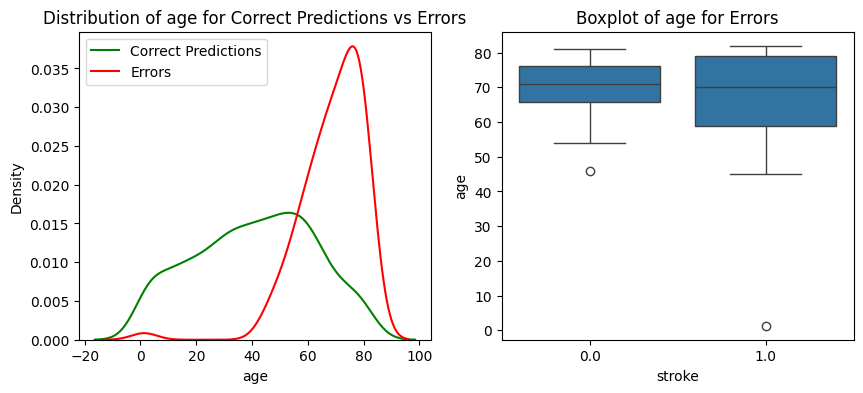

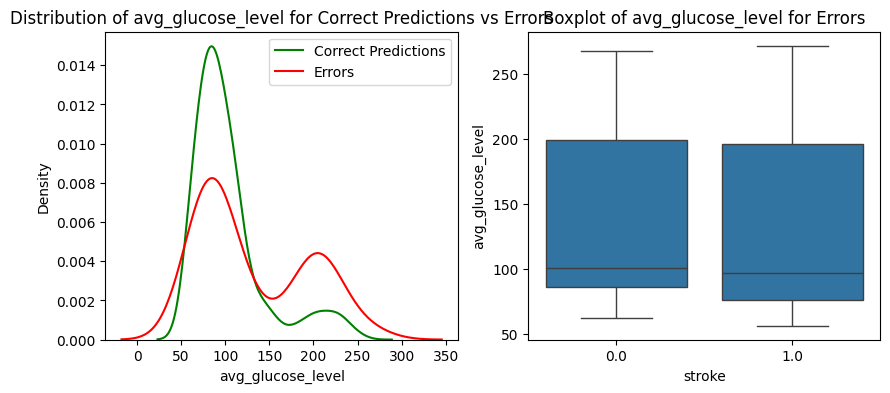

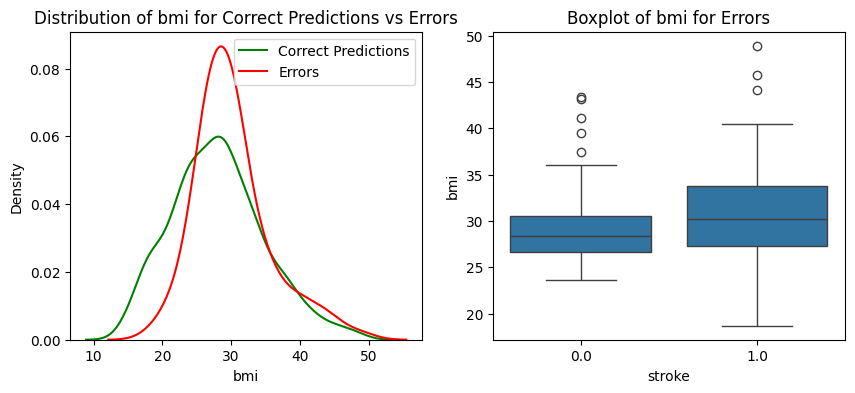

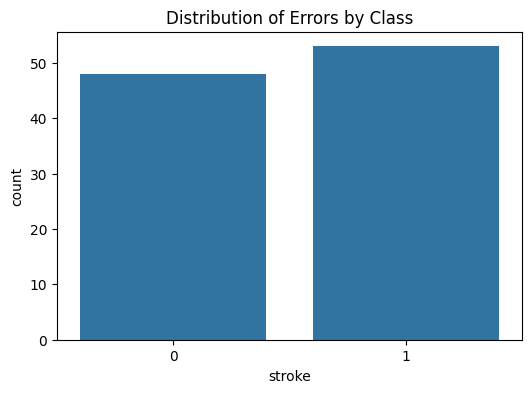

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from google.colab import drive
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML_Project/brain_stroke.csv'
df = pd.read_csv(file_path)

# Handling Missing Values: Fill missing values with the mean of the column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify categorical columns excluding the target variable
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the dataset to verify
df.head()

# Split data
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

def train_random_forest(X_train, y_train, n_estimators):
    model = RandomForestClassifier(n_estimators=n_estimators, class_weight='balanced', random_state=42)
    y_pred = cross_val_predict(model, X_train, y_train, cv=3)  # 3-fold cross-validation
    return y_pred, model

def evaluate_model(y_true, y_pred, model_name, parameter):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)
    print(f"{model_name} (Parameter={parameter}): Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")
    return accuracy, y_pred

# Model: Random Forest with Cross-Validation
best_n_estimators = None
best_accuracy = 0

print("\nModel: Random Forest with Cross-Validation")
for n_estimators in [50, 100, 150, 200]:
    y_pred, _ = train_random_forest(X_train, y_train, n_estimators)
    accuracy, _ = evaluate_model(y_train, y_pred, "Random Forest", n_estimators)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best parameter: {best_n_estimators}")

# Train the final model using the entire training set with the best parameter
model2 = RandomForestClassifier(n_estimators=best_n_estimators, class_weight='balanced', random_state=42)
model2.fit(X_train, y_train)

# Evaluate on the Test Set
accuracy_test, y_pred_test = evaluate_model(y_test, model2.predict(X_test), "Random Forest (using the entire training set)", best_n_estimators)

# Analyze errors
errors = y_test != y_pred_test
error_indices = errors[errors].index
error_instances = pd.DataFrame(X_test[errors, :], columns=X.columns)

# Predict probabilities for the positive class (stroke)
y_pred_proba = model2.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Example of evaluating AUC-ROC
y_pred_proba_rf = model2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC: {roc_auc:.4f}")

print ("----------------------------------------------------------------------------------------------------")

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Extract confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

# Print values
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


# Feature Importance Analysis
feature_importances = model2.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

print("")

print ("error instances:")

# Print first few rows of error instances
print(error_instances.head())

print ("error instances summary:")
# Explore summary statistics of error instances
print(error_instances.describe())

# Analyzing Error Instances
error_stats = error_instances.describe()
print(error_stats)

# Compare the distributions of errors vs correct predictions for key features
selected_features = ['age', 'avg_glucose_level', 'bmi']  # replace with features of interest
for feature_name in selected_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[y_test.index[~errors], feature_name], color='green', label='Correct Predictions')
    sns.kdeplot(df.loc[y_test.index[errors], feature_name], color='red', label='Errors')
    plt.title(f'Distribution of {feature_name} for Correct Predictions vs Errors')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(x=y_test[errors], y=df.loc[y_test.index, feature_name])
    plt.title(f'Boxplot of {feature_name} for Errors')

    plt.show()

# Visualize class distribution in errors
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test[errors])
plt.title('Distribution of Errors by Class')
plt.show()
